Fold 1 - RMSE: 0.667859163792701, R²: 0.5318709173672465
Fold 2 - RMSE: 0.7129967484209117, R²: 0.4505181891143327
Fold 3 - RMSE: 0.601173416668904, R²: 0.6745334084142292
Fold 4 - RMSE: 0.7126016887571489, R²: 0.5398516864818903
Fold 5 - RMSE: 0.6598073157068808, R²: 0.5004607324040992
Mean RMSE: 0.6708876666693093
Mean R²: 0.5394469867563596


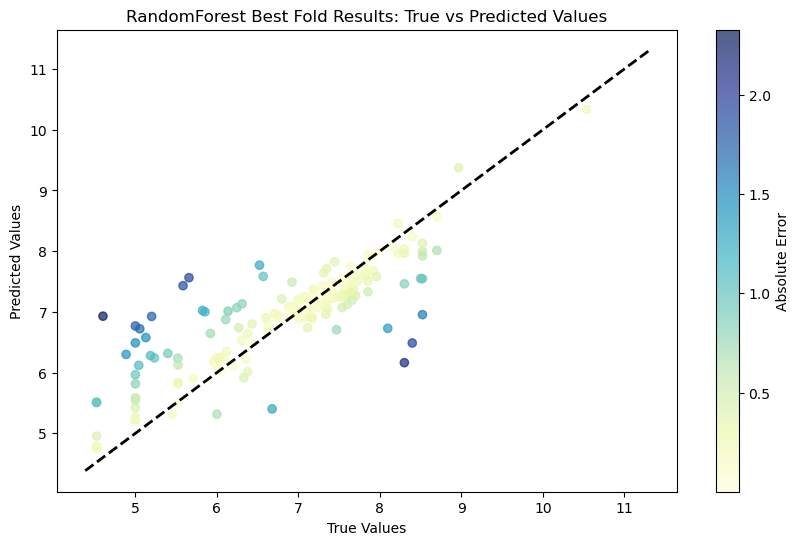

In [1]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import RDKFingerprint
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Set random seed
np.random.seed(30)

# Load the dataset
file_path = '/home/vesper/文档/lab/CDK9/dataset/cleaned_CDK9.csv'
data = pd.read_csv(file_path)

# Function to compute RDKit fingerprint
def compute_rdkit_fingerprint(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        return RDKFingerprint(mol)
    else:
        return None

# Filter out invalid molecules
data['fingerprint'] = data['smiles'].apply(compute_rdkit_fingerprint)
data = data.dropna(subset=['fingerprint'])

# Convert fingerprints to numpy array
X = np.array([fp.ToBitString() for fp in data['fingerprint']])
X = np.array([list(map(int, list(x))) for x in X])

# Target variable
y = data['pIC50'].astype(float)

# Initialize the Random Forest Regressor with default parameters
rf = RandomForestRegressor(random_state=42)

# 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

rmse_scores = []
r2_scores = []

# Perform cross-validation
for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    
    rmse_scores.append(rmse)
    r2_scores.append(r2)
    
    print(f"Fold {fold} - RMSE: {rmse}, R²: {r2}")

mean_rmse = np.mean(rmse_scores)
mean_r2 = np.mean(r2_scores)

# Print the mean results
print(f"Mean RMSE: {mean_rmse}")
print(f"Mean R²: {mean_r2}")

# Save the results to a CSV file
results = pd.DataFrame({"RMSE": rmse_scores, "R2": r2_scores})
results.to_csv('RandomForest_cross_validation_results.csv', index=False)

# Function to plot results for the best fold
def plot_best_fold(X, y, model, kf):
    best_fold = None
    best_rmse = float('inf')
    y_true_best = None
    y_pred_best = None
    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        rmse = mean_squared_error(y_test, y_pred, squared=False)
        if rmse < best_rmse:
            best_rmse = rmse
            best_fold = (train_index, test_index)
            y_true_best = y_test
            y_pred_best = y_pred
    
    plt.figure(figsize=(10, 6))
    errors = np.abs(y_true_best - y_pred_best)
    scatter = plt.scatter(y_true_best, y_pred_best, c=errors, cmap='YlGnBu', alpha=0.7)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.title('RandomForest Best Fold Results: True vs Predicted Values')
    plt.colorbar(scatter, label='Absolute Error')
    plt.show()

# Plot the best fold
plot_best_fold(X, y, rf, kf)


Fold 1 - RMSE: 0.637771567862785, R²: 0.5731000022847526
Fold 2 - RMSE: 0.7389207853343768, R²: 0.409834268014062
Fold 3 - RMSE: 0.6302233894787619, R²: 0.6423189649839806
Fold 4 - RMSE: 0.7336231680393308, R²: 0.5123028516079626
Fold 5 - RMSE: 0.6632174014250511, R²: 0.4952838460238036
Mean RMSE: 0.680751262428061
Mean R²: 0.5265679865829123


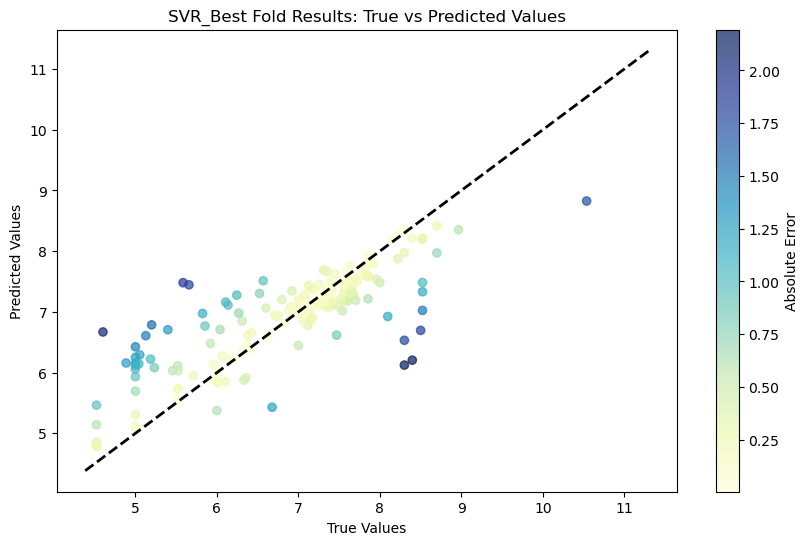

In [2]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import RDKFingerprint
from sklearn.svm import SVR
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Set random seed
np.random.seed(30)

# Load the dataset
file_path = '/home/vesper/文档/lab/CDK9/dataset/cleaned_CDK9.csv'
data = pd.read_csv(file_path)

# Function to compute RDKit fingerprint
def compute_rdkit_fingerprint(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        return RDKFingerprint(mol)
    else:
        return None

# Filter out invalid molecules
data['fingerprint'] = data['smiles'].apply(compute_rdkit_fingerprint)
data = data.dropna(subset=['fingerprint'])

# Convert fingerprints to numpy array
X = np.array([fp.ToBitString() for fp in data['fingerprint']])
X = np.array([list(map(int, list(x))) for x in X])

# Target variable
y = data['pIC50'].astype(float)

# Initialize the SVR model
svr = SVR()

# 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

rmse_scores = []
r2_scores = []

# Perform cross-validation
for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    svr.fit(X_train, y_train)
    y_pred = svr.predict(X_test)
    
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    
    rmse_scores.append(rmse)
    r2_scores.append(r2)
    
    print(f"Fold {fold} - RMSE: {rmse}, R²: {r2}")

mean_rmse = np.mean(rmse_scores)
mean_r2 = np.mean(r2_scores)

# Print the mean results
print(f"Mean RMSE: {mean_rmse}")
print(f"Mean R²: {mean_r2}")

# Save the results to a CSV file
results = pd.DataFrame({"RMSE": rmse_scores, "R2": r2_scores})
results.to_csv('SVR_cross_validation_results.csv', index=False)

# Function to plot results for the best fold
def plot_best_fold(X, y, model, kf):
    best_fold = None
    best_rmse = float('inf')
    y_true_best = None
    y_pred_best = None
    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        rmse = mean_squared_error(y_test, y_pred, squared=False)
        if rmse < best_rmse:
            best_rmse = rmse
            best_fold = (train_index, test_index)
            y_true_best = y_test
            y_pred_best = y_pred
    
    plt.figure(figsize=(10, 6))
    errors = np.abs(y_true_best - y_pred_best)
    scatter = plt.scatter(y_true_best, y_pred_best, c=errors, cmap='YlGnBu', alpha=0.7)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.title('SVR_Best Fold Results: True vs Predicted Values')
    plt.colorbar(scatter, label='Absolute Error')
    plt.show()

# Plot the best fold
plot_best_fold(X, y, svr, kf)

Fold 1 - RMSE: 0.6949411842100396, R²: 0.4931354196315789
Fold 2 - RMSE: 0.825238796062172, R²: 0.26389885057721607
Fold 3 - RMSE: 0.6444167027280002, R²: 0.6260268209182207
Fold 4 - RMSE: 0.6988195676669136, R²: 0.5574786236014851
Fold 5 - RMSE: 0.7340188205151794, R²: 0.3817704340381429
Mean RMSE: 0.7194870142364609
Mean R²: 0.46446202975332884


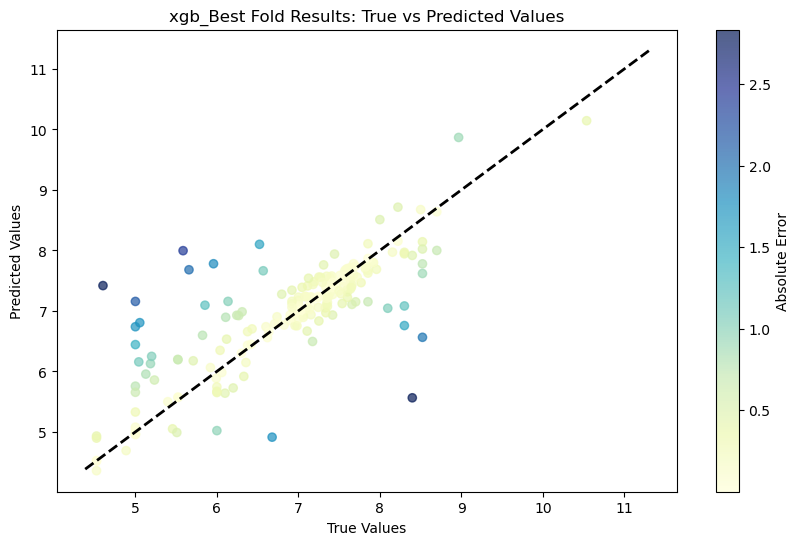

In [3]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import RDKFingerprint
from xgboost import XGBRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Set random seed
np.random.seed(30)

# Load the dataset
file_path = '/home/vesper/文档/lab/CDK9/dataset/cleaned_CDK9.csv'
data = pd.read_csv(file_path)

# Function to compute RDKit fingerprint
def compute_rdkit_fingerprint(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        return RDKFingerprint(mol)
    else:
        return None

# Filter out invalid molecules
data['fingerprint'] = data['smiles'].apply(compute_rdkit_fingerprint)
data = data.dropna(subset=['fingerprint'])

# Convert fingerprints to numpy array
X = np.array([fp.ToBitString() for fp in data['fingerprint']])
X = np.array([list(map(int, list(x))) for x in X])

# Target variable
y = data['pIC50'].astype(float)

# Initialize the XGBoost Regressor
xgb = XGBRegressor(random_state=42)

# 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

rmse_scores = []
r2_scores = []

# Perform cross-validation
for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    xgb.fit(X_train, y_train)
    y_pred = xgb.predict(X_test)
    
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    
    rmse_scores.append(rmse)
    r2_scores.append(r2)
    
    print(f"Fold {fold} - RMSE: {rmse}, R²: {r2}")

mean_rmse = np.mean(rmse_scores)
mean_r2 = np.mean(r2_scores)

# Print the mean results
print(f"Mean RMSE: {mean_rmse}")
print(f"Mean R²: {mean_r2}")

# Save the results to a CSV file
results = pd.DataFrame({"RMSE": rmse_scores, "R2": r2_scores})
results.to_csv('xgb_cross_validation_results.csv', index=False)

# Function to plot results for the best fold
def plot_best_fold(X, y, model, kf):
    best_fold = None
    best_rmse = float('inf')
    y_true_best = None
    y_pred_best = None
    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        rmse = mean_squared_error(y_test, y_pred, squared=False)
        if rmse < best_rmse:
            best_rmse = rmse
            best_fold = (train_index, test_index)
            y_true_best = y_test
            y_pred_best = y_pred
    
    plt.figure(figsize=(10, 6))
    errors = np.abs(y_true_best - y_pred_best)
    scatter = plt.scatter(y_true_best, y_pred_best, c=errors, cmap='YlGnBu', alpha=0.7)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.title('xgb_Best Fold Results: True vs Predicted Values')
    plt.colorbar(scatter, label='Absolute Error')
    plt.show()

# Plot the best fold
plot_best_fold(X, y, xgb, kf)

Fold 1 - RMSE: 0.6961574139428423, R²: 0.49135972053751986
Fold 2 - RMSE: 0.8313533564024593, R²: 0.25295023878642653
Fold 3 - RMSE: 0.8014406682363813, R²: 0.421571567725773
Fold 4 - RMSE: 0.8836521037299762, R²: 0.29243430036145057
Fold 5 - RMSE: 0.7861817193677807, R²: 0.29077952987072087
Mean RMSE: 0.7997570523358879
Mean R²: 0.34981907145637814


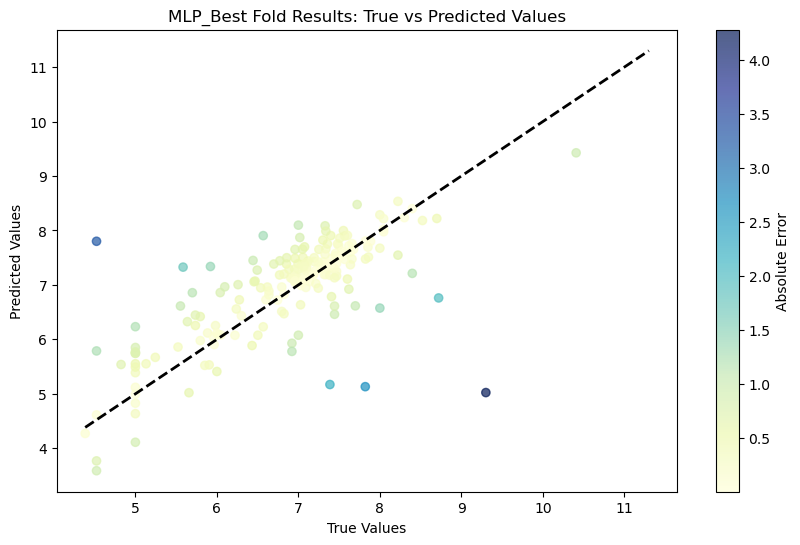

In [4]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import RDKFingerprint
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Set random seed
np.random.seed(30)

# Load the dataset
file_path = '/home/vesper/文档/lab/CDK9/dataset/cleaned_CDK9.csv'
data = pd.read_csv(file_path)

# Function to compute RDKit fingerprint
def compute_rdkit_fingerprint(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        return RDKFingerprint(mol)
    else:
        return None

# Filter out invalid molecules
data['fingerprint'] = data['smiles'].apply(compute_rdkit_fingerprint)
data = data.dropna(subset=['fingerprint'])

# Convert fingerprints to numpy array
X = np.array([fp.ToBitString() for fp in data['fingerprint']])
X = np.array([list(map(int, list(x))) for x in X])

# Target variable
y = data['pIC50'].astype(float)

# Initialize the MLP Regressor
mlp = MLPRegressor(random_state=42, max_iter=500)

# 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

rmse_scores = []
r2_scores = []

# Perform cross-validation
for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    mlp.fit(X_train, y_train)
    y_pred = mlp.predict(X_test)
    
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    
    rmse_scores.append(rmse)
    r2_scores.append(r2)
    
    print(f"Fold {fold} - RMSE: {rmse}, R²: {r2}")

mean_rmse = np.mean(rmse_scores)
mean_r2 = np.mean(r2_scores)

# Print the mean results
print(f"Mean RMSE: {mean_rmse}")
print(f"Mean R²: {mean_r2}")

# Save the results to a CSV file
results = pd.DataFrame({"RMSE": rmse_scores, "R2": r2_scores})
results.to_csv('MLP_cross_validation_results.csv', index=False)

# Function to plot results for the best fold
def plot_best_fold(X, y, model, kf):
    best_fold = None
    best_rmse = float('inf')
    y_true_best = None
    y_pred_best = None
    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        rmse = mean_squared_error(y_test, y_pred, squared=False)
        if rmse < best_rmse:
            best_rmse = rmse
            best_fold = (train_index, test_index)
            y_true_best = y_test
            y_pred_best = y_pred
    
    plt.figure(figsize=(10, 6))
    errors = np.abs(y_true_best - y_pred_best)
    scatter = plt.scatter(y_true_best, y_pred_best, c=errors, cmap='YlGnBu', alpha=0.7)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.title('MLP_Best Fold Results: True vs Predicted Values')
    plt.colorbar(scatter, label='Absolute Error')
    plt.show()

# Plot the best fold
plot_best_fold(X, y, mlp, kf)


Fold 1 - RMSE: 0.6435607494795327, R²: 0.5653147122203002
Fold 2 - RMSE: 0.7914020549494121, R²: 0.32302509572035
Fold 3 - RMSE: 0.6233977529274507, R²: 0.6500247403878552
Fold 4 - RMSE: 0.7777442037664802, R²: 0.45187740330063353
Fold 5 - RMSE: 0.7244180818353203, R²: 0.39783717061279644
Mean RMSE: 0.7121045685916393
Mean R²: 0.477615824448387


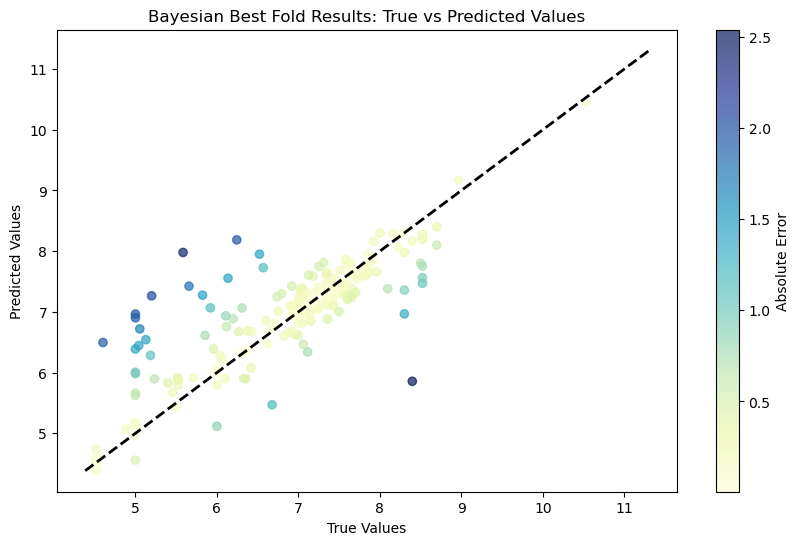

In [5]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import RDKFingerprint
from sklearn.linear_model import BayesianRidge
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Set random seed
np.random.seed(30)

# Load the dataset
file_path = '/home/vesper/文档/lab/CDK9/dataset/cleaned_CDK9.csv'
data = pd.read_csv(file_path)

# Function to compute RDKit fingerprint
def compute_rdkit_fingerprint(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        return RDKFingerprint(mol)
    else:
        return None

# Filter out invalid molecules
data['fingerprint'] = data['smiles'].apply(compute_rdkit_fingerprint)
data = data.dropna(subset=['fingerprint'])

# Convert fingerprints to numpy array
X = np.array([fp.ToBitString() for fp in data['fingerprint']])
X = np.array([list(map(int, list(x))) for x in X])

# Target variable
y = data['pIC50'].astype(float)

# Initialize the Bayesian Ridge Regressor
br = BayesianRidge()

# 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

rmse_scores = []
r2_scores = []

# Perform cross-validation
for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    br.fit(X_train, y_train)
    y_pred = br.predict(X_test)
    
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    
    rmse_scores.append(rmse)
    r2_scores.append(r2)
    
    print(f"Fold {fold} - RMSE: {rmse}, R²: {r2}")

mean_rmse = np.mean(rmse_scores)
mean_r2 = np.mean(r2_scores)

# Print the mean results
print(f"Mean RMSE: {mean_rmse}")
print(f"Mean R²: {mean_r2}")

# Save the results to a CSV file
results = pd.DataFrame({"RMSE": rmse_scores, "R2": r2_scores})
results.to_csv('Bayesian_cross_validation_results.csv', index=False)

# Function to plot results for the best fold
def plot_best_fold(X, y, model, kf):
    best_fold = None
    best_rmse = float('inf')
    y_true_best = None
    y_pred_best = None
    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        rmse = mean_squared_error(y_test, y_pred, squared=False)
        if rmse < best_rmse:
            best_rmse = rmse
            best_fold = (train_index, test_index)
            y_true_best = y_test
            y_pred_best = y_pred
    
    plt.figure(figsize=(10, 6))
    errors = np.abs(y_true_best - y_pred_best)
    scatter = plt.scatter(y_true_best, y_pred_best, c=errors, cmap='YlGnBu', alpha=0.7)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.title('Bayesian Best Fold Results: True vs Predicted Values')
    plt.colorbar(scatter, label='Absolute Error')
    plt.show()

# Plot the best fold
plot_best_fold(X, y, br, kf)

Fold 1 - RMSE: 0.6822291079357862, R²: 0.511509261721157
Fold 2 - RMSE: 0.7345357912509273, R²: 0.41681795194147153
Fold 3 - RMSE: 0.6177995642346535, R²: 0.6562821594417545
Fold 4 - RMSE: 0.7209693223838635, R²: 0.5289817750097423
Fold 5 - RMSE: 0.6791752447500117, R²: 0.4707034349904604
Mean RMSE: 0.6869418061110484
Mean R²: 0.5168589166209171


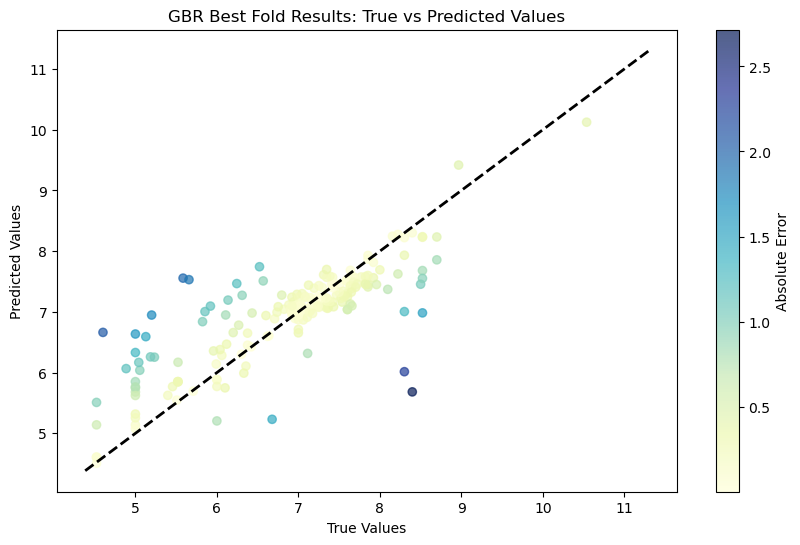

In [6]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import RDKFingerprint
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Set random seed
np.random.seed(30)

# Load the dataset
file_path = '/home/vesper/文档/lab/CDK9/dataset/cleaned_CDK9.csv'
data = pd.read_csv(file_path)

# Function to compute RDKit fingerprint
def compute_rdkit_fingerprint(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        return RDKFingerprint(mol)
    else:
        return None

# Filter out invalid molecules
data['fingerprint'] = data['smiles'].apply(compute_rdkit_fingerprint)
data = data.dropna(subset=['fingerprint'])

# Convert fingerprints to numpy array
X = np.array([fp.ToBitString() for fp in data['fingerprint']])
X = np.array([list(map(int, list(x))) for x in X])

# Target variable
y = data['pIC50'].astype(float)

# Initialize the Gradient Boosting Regressor
gbr = GradientBoostingRegressor(random_state=42)

# 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

rmse_scores = []
r2_scores = []

# Perform cross-validation
for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    gbr.fit(X_train, y_train)
    y_pred = gbr.predict(X_test)
    
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    
    rmse_scores.append(rmse)
    r2_scores.append(r2)
    
    print(f"Fold {fold} - RMSE: {rmse}, R²: {r2}")

mean_rmse = np.mean(rmse_scores)
mean_r2 = np.mean(r2_scores)

# Print the mean results
print(f"Mean RMSE: {mean_rmse}")
print(f"Mean R²: {mean_r2}")

# Save the results to a CSV file
results = pd.DataFrame({"RMSE": rmse_scores, "R2": r2_scores})
results.to_csv('gbr_cross_validation_results.csv', index=False)

# Function to plot results for the best fold
def plot_best_fold(X, y, model, kf):
    best_fold = None
    best_rmse = float('inf')
    y_true_best = None
    y_pred_best = None
    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        rmse = mean_squared_error(y_test, y_pred, squared=False)
        if rmse < best_rmse:
            best_rmse = rmse
            best_fold = (train_index, test_index)
            y_true_best = y_test
            y_pred_best = y_pred
    
    plt.figure(figsize=(10, 6))
    errors = np.abs(y_true_best - y_pred_best)
    scatter = plt.scatter(y_true_best, y_pred_best, c=errors, cmap='YlGnBu', alpha=0.7)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.title('GBR Best Fold Results: True vs Predicted Values')
    plt.colorbar(scatter, label='Absolute Error')
    plt.show()

# Plot the best fold
plot_best_fold(X, y, gbr, kf)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013864 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4060
[LightGBM] [Info] Number of data points in the train set: 799, number of used features: 2030
[LightGBM] [Info] Start training from score 6.995996
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

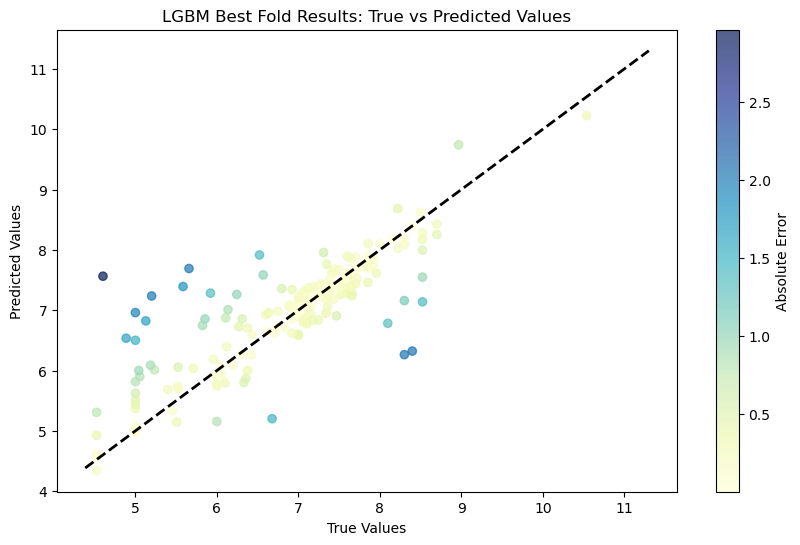

In [21]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import RDKFingerprint
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import lightgbm as lgb
import matplotlib.pyplot as plt

# Set random seed
np.random.seed(30)

# Load the dataset
file_path = '/home/vesper/文档/lab/CDK9/dataset/cleaned_CDK9.csv'
data = pd.read_csv(file_path)

# Function to compute RDKit fingerprint
def compute_rdkit_fingerprint(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        return RDKFingerprint(mol)
    else:
        return None

# Filter out invalid molecules
data['fingerprint'] = data['smiles'].apply(compute_rdkit_fingerprint)
data = data.dropna(subset=['fingerprint'])

# Convert fingerprints to numpy array
X = np.array([fp.ToBitString() for fp in data['fingerprint']])
X = np.array([list(map(int, list(x))) for x in X])

# Target variable
y = data['pIC50'].astype(float)

# Initialize the LightGBM Regressor with default parameters
lgb_model = lgb.LGBMRegressor(random_state=42)

# 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

rmse_scores = []
r2_scores = []

# Perform cross-validation
for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    lgb_model.fit(X_train, y_train)
    y_pred = lgb_model.predict(X_test)
    
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    
    rmse_scores.append(rmse)
    r2_scores.append(r2)
    
    print(f"Fold {fold} - RMSE: {rmse}, R²: {r2}")

mean_rmse = np.mean(rmse_scores)
mean_r2 = np.mean(r2_scores)

# Print the mean results
print(f"Mean RMSE: {mean_rmse}")
print(f"Mean R²: {mean_r2}")

# Save the results to a CSV file
results = pd.DataFrame({"RMSE": rmse_scores, "R2": r2_scores})
results.to_csv('LGBM_cross_validation_results_lgb.csv', index=False)

# Function to plot results for the best fold
def plot_best_fold(X, y, model, kf):
    best_fold = None
    best_rmse = float('inf')
    y_true_best = None
    y_pred_best = None
    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        rmse = mean_squared_error(y_test, y_pred, squared=False)
        if rmse < best_rmse:
            best_rmse = rmse
            best_fold = (train_index, test_index)
            y_true_best = y_test
            y_pred_best = y_pred
    
    plt.figure(figsize=(10, 6))
    errors = np.abs(y_true_best - y_pred_best)
    scatter = plt.scatter(y_true_best, y_pred_best, c=errors, cmap='YlGnBu', alpha=0.7)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.title('LGBM Best Fold Results: True vs Predicted Values')
    plt.colorbar(scatter, label='Absolute Error')
    plt.show()

# Plot the best fold
plot_best_fold(X, y, lgb_model, kf)

Fold 1 - RMSE: 0.6997427564479655, R²: 0.48610704162446605
Fold 2 - RMSE: 0.7729086983575341, R²: 0.3542943120364054
Fold 3 - RMSE: 0.6205697097801581, R²: 0.6531928626379964
Fold 4 - RMSE: 0.7088704938742668, R²: 0.5446577603171224
Fold 5 - RMSE: 0.7105497257679805, R²: 0.4206722497669544
Mean RMSE: 0.702528276845581
Mean R²: 0.4917848452765889


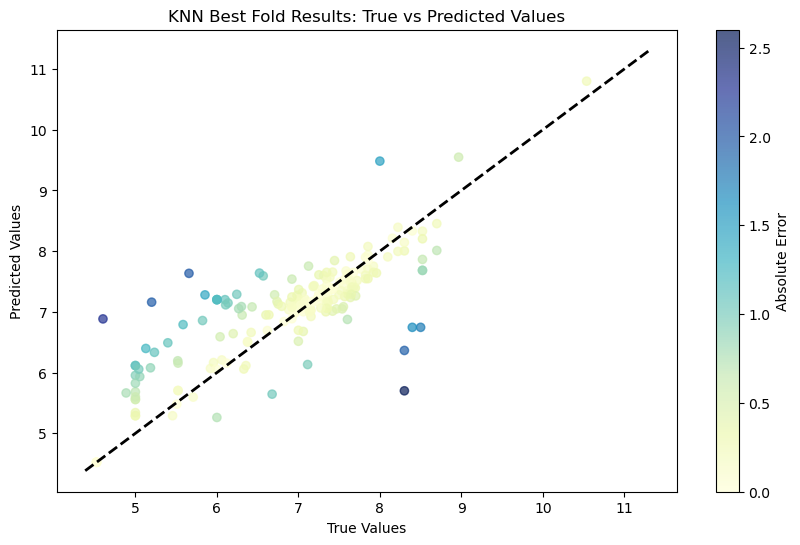

In [10]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import RDKFingerprint
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Set random seed
np.random.seed(30)

# Load the dataset
file_path = '/home/vesper/文档/lab/CDK9/dataset/cleaned_CDK9.csv'
data = pd.read_csv(file_path)

# Function to compute RDKit fingerprint
def compute_rdkit_fingerprint(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        return RDKFingerprint(mol)
    else:
        return None

# Filter out invalid molecules
data['fingerprint'] = data['smiles'].apply(compute_rdkit_fingerprint)
data = data.dropna(subset=['fingerprint'])

# Convert fingerprints to numpy array
X = np.array([fp.ToBitString() for fp in data['fingerprint']])
X = np.array([list(map(int, list(x))) for x in X])

# Target variable
y = data['pIC50'].astype(float)

# Initialize the KNN Regressor with default parameters
knn = KNeighborsRegressor()

# 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

rmse_scores = []
r2_scores = []

# Perform cross-validation
for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    
    rmse_scores.append(rmse)
    r2_scores.append(r2)
    
    print(f"Fold {fold} - RMSE: {rmse}, R²: {r2}")

mean_rmse = np.mean(rmse_scores)
mean_r2 = np.mean(r2_scores)

# Print the mean results
print(f"Mean RMSE: {mean_rmse}")
print(f"Mean R²: {mean_r2}")

# Save the results to a CSV file
results = pd.DataFrame({"RMSE": rmse_scores, "R2": r2_scores})
results.to_csv('KNN_cross_validation_results_knn.csv', index=False)

# Function to plot results for the best fold
def plot_best_fold(X, y, model, kf):
    best_fold = None
    best_rmse = float('inf')
    y_true_best = None
    y_pred_best = None
    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        rmse = mean_squared_error(y_test, y_pred, squared=False)
        if rmse < best_rmse:
            best_rmse = rmse
            best_fold = (train_index, test_index)
            y_true_best = y_test
            y_pred_best = y_pred
    
    plt.figure(figsize=(10, 6))
    errors = np.abs(y_true_best - y_pred_best)
    scatter = plt.scatter(y_true_best, y_pred_best, c=errors, cmap='YlGnBu', alpha=0.7)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.title('KNN Best Fold Results: True vs Predicted Values')
    plt.colorbar(scatter, label='Absolute Error')
    plt.show()

# Plot the best fold
plot_best_fold(X, y, knn, kf)
